In [71]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [72]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [74]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [75]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [76]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [77]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [79]:
# DELECT THIS UNLESS IT IS NEEDED BUT DELETE THIS !!!!!!!!!!!
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [80]:
# Find the most recent date in the data set.
most_recent_data_point = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_data_point

('2017-08-23',)

In [81]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
one_year_from_last_date = dt.date(2017,8,23) - dt.timedelta(days =365)
print(one_year_from_last_date)



2016-08-23


In [82]:
# Perform a query to retrieve the data and precipitation scores

data_precipitation = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_from_last_date, measurement.prcp != None).\
    order_by(measurement.date).all()
#print data to see if solution works
print(data_precipitation)




[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9), ('2016-08-30', 0.0), ('2016-08-30', 0.0), ('2016-08-30', 0.02), ('2016-08-30', 0.0), ('

In [83]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
df = pd.DataFrame (data_precipitation, columns = ['Date', 'Precipitation'])
df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79


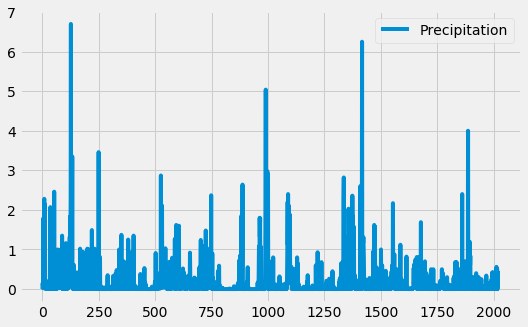

In [84]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize = (8,5))
#Use pandas to save plot file
plt.savefig('Precipitation')

In [85]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [87]:
# Design a query to calculate the total number of stations in the dataset
Total_Stations = session.query(measurement.station).distinct().count()
Total_Stations

9

In [89]:
# Design a query to find the most active stations 
#(i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Active_stations = session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
Active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
best_station = Active_stations[0][0]
min_max_avg = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                filter(measurement.station == best_station).all() 
min_max_avg




[(54.0, 85.0, 71.66378066378067)]

In [105]:
# Using the most active station id Query the last 12 months of temperature observation data for this station
tempurture_data = session.query(measurement.station, measurement.tobs).\
                filter(measurement.station == best_station).\
                filter(measurement.date >= one_year_from_last_date).all()
tempurture_data_df = pd.DataFrame(tempurture_data)
tempurture_data_df.head() 



,0,1
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


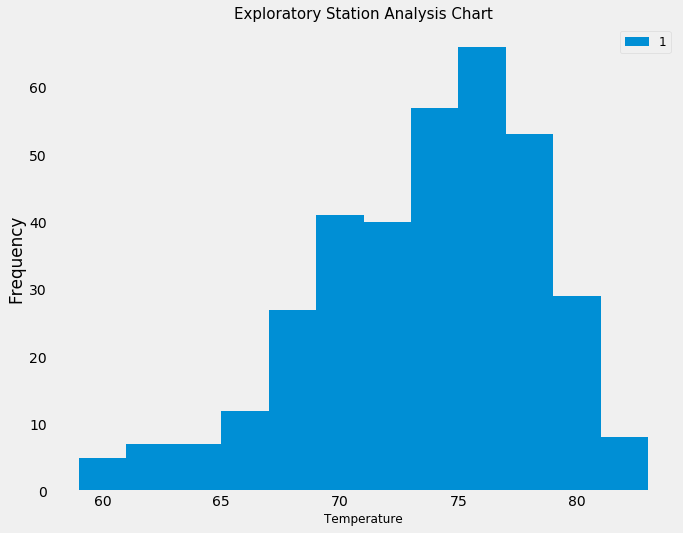

In [114]:
#Plot the results as a histogram
tempurture_data_df.plot.hist(by='station', bins=12, figsize=(10,8))
plt.grid()
plt.title("Exploratory Station Analysis Chart", fontsize=15)
plt.xlabel("Temperature", fontsize=12)
plt.legend(bbox_to_anchor=(1,1), fontsize=12)
plt.savefig('Tempurture_Data')

# Close Session

In [115]:
# Close Session
session.close()